# Solution Assignment 2
Linear Regression Model of Iris dataset 

## Package imports

In [17]:
import pymc as pm
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az

## Read dataset

In [18]:
df = pd.read_csv('iris.csv')
petal_length = df['petal_length']
sepal_length = df['sepal_length']
petal_width = df['petal_width']

## Pearson Coefficient Calculations

In [19]:
stats.pearsonr(sepal_length,petal_width)

PearsonRResult(statistic=0.8179411262715756, pvalue=2.3254980797931636e-37)

In [20]:
stats.pearsonr(petal_length,petal_width)

PearsonRResult(statistic=0.962865431402796, pvalue=4.675003907328653e-86)

## Conclusion
Petal length has greater Pearson Coefficient, meaning stronger positive linear correlation. Sepal Length is Pearson Coefficient is positive but lesser in magnitude so it has a relatively weaker positive linear correlation. So X1 is  Petal Length, and X2 is Sepal Length. 

## Model 1 (Based on Petal Length)

Text(0, 0.5, 'y')

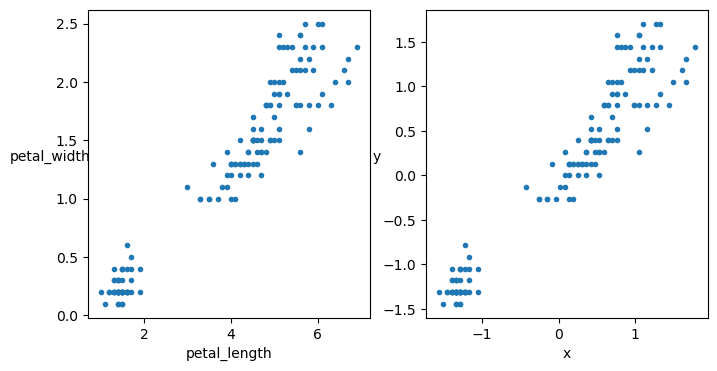

In [21]:
_, ax = plt.subplots(1,2,figsize=(8, 4))
ax[0].plot(petal_length, petal_width, 'C0.')
ax[0].set_xlabel('petal_length')
ax[0].set_ylabel('petal_width', rotation=0)

#Normalize Data
x = (petal_length-petal_length.mean())/petal_length.std()
y = (petal_width - petal_width.mean())/ petal_width.std()

ax[1].plot(x, y, 'C0.')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y', rotation=0)


In [22]:
with pm.Model() as PetalLengthModel:
    α = pm.Normal('α', mu=0, sigma=10)
    β = pm.Normal('β', mu=0, sigma=1)
    ϵ = pm.HalfCauchy('ϵ', 5)

    μ = pm.Deterministic('μ', α + β * x)
    y_pred = pm.Normal('y_pred', mu=μ, sigma=ϵ, observed=y)

    idata_g = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [α, β, ϵ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


## R-Squared for model 1

In [23]:
ppc = pm.sample_posterior_predictive(idata_g, model=PetalLengthModel)

Sampling: [y_pred]


In [24]:
y_true = y.to_numpy()
y_pred_ppc = az.extract(ppc, group="posterior_predictive", var_names="y_pred").values.T
az.r2_score(y_true, y_pred_ppc)

r2        0.87101
r2_std    0.01431
dtype: float64

## Model 2 Sepal Length

Text(0, 0.5, 'y')

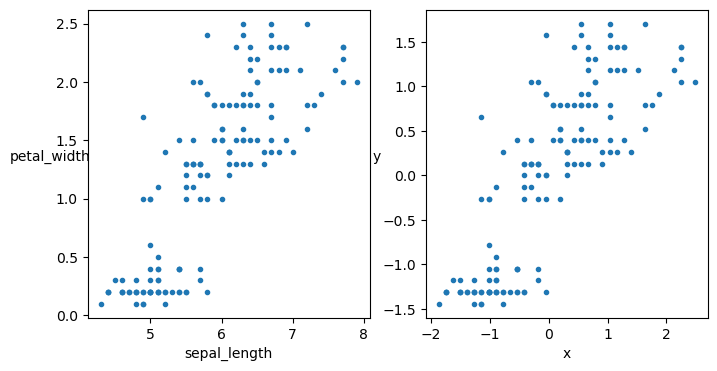

In [25]:
_, ax = plt.subplots(1,2,figsize=(8, 4))
ax[0].plot(sepal_length, petal_width, 'C0.')
ax[0].set_xlabel('sepal_length')
ax[0].set_ylabel('petal_width', rotation=0)

# Normalize Data
x = (sepal_length-sepal_length.mean())/sepal_length.std()

ax[1].plot(x, y, 'C0.')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y', rotation=0)

In [26]:
with pm.Model() as SepalLengthModel:
    α = pm.Normal('α', mu=0, sigma=10)
    β = pm.Normal('β', mu=0, sigma=1)
    ϵ = pm.HalfCauchy('ϵ', 5)

    μ = pm.Deterministic('μ', α + β * x)
    y_pred = pm.Normal('y_pred', mu=μ, sigma=ϵ, observed=y)

    idata_g = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [α, β, ϵ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


### R-Squared for model 2 ###

In [27]:
ppc = pm.sample_posterior_predictive(idata_g, model=SepalLengthModel)
y_pred_ppc = az.extract(ppc, group="posterior_predictive", var_names="y_pred").values.T
az.r2_score(y_true, y_pred_ppc)

Sampling: [y_pred]


r2        0.598454
r2_std    0.034090
dtype: float64

# Conclusion
- 87% of variance in Petal width is due to change in petal length
- 59% of variance in Petal width is due to change in sepal length